In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as shc
import nltk
import re
import spacy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, silhouette_score, precision_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_classif, mutual_info_regression, SelectKBest
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, VotingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from xgboost import XGBClassifier, XGBRFRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

####### NLTK liabries #######
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


######## Import all Functions ########
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU, LeakyReLU, ELU, PReLU
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import sigmoid, tanh, softmax
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, Huber, MSE
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.regularizers import L2, L1, l1_l2


####### Some downloading files #######
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
###### Import the dataset of IMDB ######
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
####### For Computation power we will take only 10000 dataset #####
df = df[0:10000]

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
###### Show the shape of this dataset ######
print("# of rows of this IMDB dataset is: ", df.shape[0],'\n')
print("# of columns of its IMDB dataset : ", df.shape[1])

# of rows of this IMDB dataset is:  10000 

# of columns of its IMDB dataset :  2


In [5]:
###### Check null value present or not ######
if df.isnull().sum().sum() == 0:
  print("NaN value does not exist.")
else:
  print("NaN value exist.")

NaN value does not exist.


In [6]:
###### Check duplicate value present or not ######
if df.duplicated().sum() > 0:
  print("Duplicate rows are present in the dataset.")
else:
  print("No duplicate rows in the dataset.")

Duplicate rows are present in the dataset.


In [7]:
###### Drop the duplicated value ######
df.drop_duplicates(inplace = True)
print("Duplicate rows have been deleted.")

Duplicate rows have been deleted.


In [8]:
###### Show the shape of this dataset ######
print("# of rows of this IMDB dataset is: ", df.shape[0],'\n')
print("# of columns of its IMDB dataset : ", df.shape[1])

# of rows of this IMDB dataset is:  9983 

# of columns of its IMDB dataset :  2


In [9]:
###### Check dataset is imbalanced or not ######
df.loc[:, 'sentiment'].value_counts()

###### Dataset is not imbalanced ######

positive    5023
negative    4960
Name: sentiment, dtype: int64

In [10]:
###### Convert the target column into Label Endoder ######
df.loc[:, 'sentiment'] = df.loc[:, 'sentiment'].map({'positive': 1, 'negative': 0})
print("Label Encoding is done in the target column.")

Label Encoding is done in the target column.


In [11]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [12]:
###### Lowering the entire review column #######
df.loc[:, 'review'] = df.loc[:, 'review'].apply(lambda x: x.lower())
print("Lower is done.\n")

df.head(2)

Lower is done.



,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1


In [13]:
###### Remove all tag lines from the dataset ######
def removeTag(eachRow_):
  clean_text_ =  re.sub(re.compile('<.*?>'), '', eachRow_)
  return clean_text_

df.loc[:, 'review'] = df.loc[:, 'review'].apply(removeTag)
print("Tag has been removed from the dataset.")

df.head(4)

Tag has been removed from the dataset.


,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0


In [14]:
###### Remove all stopwords from the dataset ######
for stop_word_ in stopwords.words('english'):
  print(stop_word_, end = " || ")

i || me || my || myself || we || our || ours || ourselves || you || you're || you've || you'll || you'd || your || yours || yourself || yourselves || he || him || his || himself || she || she's || her || hers || herself || it || it's || its || itself || they || them || their || theirs || themselves || what || which || who || whom || this || that || that'll || these || those || am || is || are || was || were || be || been || being || have || has || had || having || do || does || did || doing || a || an || the || and || but || if || or || because || as || until || while || of || at || by || for || with || about || against || between || into || through || during || before || after || above || below || to || from || up || down || in || out || on || off || over || under || again || further || then || once || here || there || when || where || why || how || all || any || both || each || few || more || most || other || some || such || no || nor || not || only || own || same || so || than || to

In [15]:
def removeStopWords(eachRow_):
  cleanedWords_ = []

  for word_ in word_tokenize(eachRow_):
    if word_ in stopwords.words('english'):
      pass
    else:
      cleanedWords_.append(word_)
  
  return ' '.join(cleanedWords_)

df.loc[:, 'review'] = df.loc[:, 'review'].apply(removeStopWords)
print("Remove Stopwords completed.")

Remove Stopwords completed.


In [16]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production . filming techniqu...,1
2,thought wonderful way spend time hot summer we...,1
3,basically 's family little boy ( jake ) thinks...,0
4,petter mattei 's `` love time money '' visuall...,1


In [17]:
###### Stemming the dataset #######
ps = PorterStemmer()
def stemming(eachRow_):
  cleaned_ = []

  for word_ in word_tokenize(eachRow_):
    cleaned_.append(ps.stem(word_))

  return ' '.join(cleaned_)
  
df.loc[:, 'review'] = df.loc[:, 'review'].apply(stemming)
print("Stemming is done.")

Stemming is done.


In [18]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod 'll hook ...,1
1,wonder littl product . film techniqu unassumin...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic 's famili littl boy ( jake ) think 's zo...,0
4,petter mattei 's `` love time money `` visual ...,1


In [80]:
####### Train and test split the dataset #######
X = df.loc[:, 'review']
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print("X_train shape is : ", X_train.shape,'\n')
print("X_test  shape is : ", X_test.shape)
print("y_train shape is : ", y_train.shape,'\n')
print("y_test  shape is : ", y_test.shape)

X_train shape is :  (6988,) 

X_test  shape is :  (2995,)
y_train shape is :  (6988,) 

y_test  shape is :  (2995,)


In [81]:
####### Applying Bag Of Words in this dataset ########
BOW_ = CountVectorizer()

X_train = BOW_.fit_transform(X_train).toarray()
X_test  = BOW_.transform(X_test).toarray()

In [82]:
###### Show the shape of X_train and X_test ######
print("X_train shape is : ", X_train.shape,'\n')
print("X_test  shape is : ", X_test.shape)

X_train shape is :  (6988, 34137) 

X_test  shape is :  (2995, 34137)


In [83]:
###### SGD Classifier ######
SGD_ = SGDClassifier()
SGD_.fit(X_train, y_train)
predicted_ = SGD_.predict(X_test)

In [84]:
print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.854424040066778
recall score is   =  0.8448164842240824
f1 score of its   =  0.8575163398692811
precision score is=  0.8706038487060385


In [22]:
###### Naive Bayes Classifier ######
naive_bayes_ = GaussianNB()
naive_bayes_.fit(X_train, y_train)
predicted_ = naive_bayes_.predict(X_test)
accuracy_score(predicted_, y_test)

0.6250417362270451

In [23]:
###### Xgboost Classifier ######
xgboost_ = XGBClassifier()
xgboost_.fit(X_train, y_train)
predicted_ = xgboost_.predict(X_test)

0.8170283806343906

In [25]:
print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.8170283806343906
recall score is   =  0.7842323651452282
f1 score of its   =  0.8284283030682529
precision score is=  0.8779031187790312


In [32]:
y

0       1
1       1
2       1
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    1
Name: sentiment, Length: 9983, dtype: int64

In [44]:
X_train.shape

(6988, 34137)

In [70]:
####### Using TFIDF #######

TFIDF_ = TfidfVectorizer(max_features = 2500)

X_train = TFIDF_.fit_transform(X_train).toarray()
X_test  = TFIDF_.transform(X_test).toarray()

In [71]:
###### Naive Bayes Classifier ######
naive_bayes_ = GaussianNB()
naive_bayes_.fit(X_train, y_train)
predicted_ = naive_bayes_.predict(X_test)
accuracy_score(predicted_, y_test)

0.7929883138564274

In [72]:
###### Xgboost Classifier ######
xgboost_ = XGBClassifier()
xgboost_.fit(X_train, y_train)
predicted_ = xgboost_.predict(X_test)

In [73]:
print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.8063439065108514
recall score is   =  0.7721667645331768
f1 score of its   =  0.8193146417445483
precision score is=  0.8725945587259456


In [74]:
###### SGD Classifier ######
SGD_ = SGDClassifier()
SGD_.fit(X_train, y_train)
predicted_ = SGD_.predict(X_test)

In [75]:
print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.8657762938230384
recall score is   =  0.8797250859106529
f1 score of its   =  0.8642808912896692
precision score is=  0.8493696084936961


In [76]:
##### MLP Classifier #####
MLP_ = MLPClassifier()
MLP_.fit(X_train, y_train)
predicted_ = MLP_.predict(X_test)

In [77]:
print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.8193656093489149
recall score is   =  0.8241610738255034
f1 score of its   =  0.8194861528194862
precision score is=  0.8148639681486397


In [78]:
##### KNearestNeighbours ######

KNN_ = KNeighborsClassifier()
KNN_.fit(X_train, y_train)
predicted_ = KNN_.predict(X_test)

In [79]:
print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.7155258764607679
recall score is   =  0.7037958929682638
f1 score of its   =  0.7263969171483623
precision score is=  0.7504976775049768


Using Deep Learning

In [57]:
###### Create a Sequential Model ######
model = Sequential()

###### Create an input layer with 128 neurons ######
model.add(Dense(units = 128, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.7))

###### Create first hidden layer with 64 neurons ######
model.add(Dense(units = 64, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.8))

###### Create second hidden layer with 32 neurons ######
model.add(Dense(units = 32, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.8))

###### Create an output layer ######
model.add(Dense(units = 1, activation = 'sigmoid'))

###### Compile the model #####
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###### Fit the model and run ######
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 11, batch_size = 32, verbose = 1)

Epoch 1/11
219/219 [==============================] - 3s 10ms/step - loss: 0.7256 - accuracy: 0.5375 - val_loss: 0.6841 - val_accuracy: 0.6037
Epoch 2/11
219/219 [==============================] - 2s 8ms/step - loss: 0.6967 - accuracy: 0.5942 - val_loss: 0.6736 - val_accuracy: 0.6080
Epoch 3/11
219/219 [==============================] - 2s 8ms/step - loss: 0.6607 - accuracy: 0.6653 - val_loss: 0.5991 - val_accuracy: 0.7803
Epoch 4/11
219/219 [==============================] - 2s 7ms/step - loss: 0.5964 - accuracy: 0.7281 - val_loss: 0.5244 - val_accuracy: 0.8214
Epoch 5/11
219/219 [==============================] - 2s 8ms/step - loss: 0.5391 - accuracy: 0.7713 - val_loss: 0.4553 - val_accuracy: 0.8457
Epoch 6/11
219/219 [==============================] - 2s 9ms/step - loss: 0.4819 - accuracy: 0.8055 - val_loss: 0.4032 - val_accuracy: 0.8634
Epoch 7/11
219/219 [==============================] - 2s 8ms/step - loss: 0.4393 - accuracy: 0.8354 - val_loss: 0.3840 - val_accuracy: 0.8544
Epoch

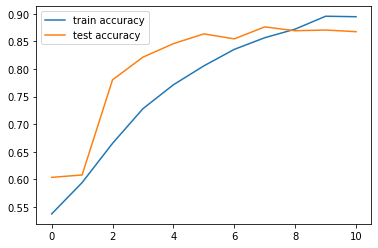

In [60]:
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

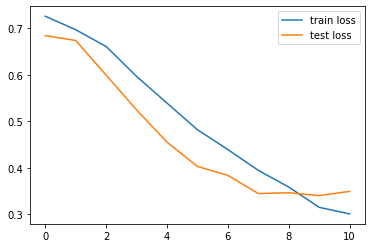

In [61]:
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()